<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Explore-Dataset" data-toc-modified-id="Explore-Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Explore Dataset</a></span></li><li><span><a href="#Investigate" data-toc-modified-id="Investigate-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Investigate</a></span><ul class="toc-item"><li><span><a href="#Are-lonelier-people-using-the-internet-more?" data-toc-modified-id="Are-lonelier-people-using-the-internet-more?-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Are lonelier people using the internet more?</a></span></li><li><span><a href="#What-mental-and-social-similarities-do-lonely-people-share?" data-toc-modified-id="What-mental-and-social-similarities-do-lonely-people-share?-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>What mental and social similarities do lonely people share?</a></span></li><li><span><a href="#Do-lonely-people-have-a-healthy-lifestyle?" data-toc-modified-id="Do-lonely-people-have-a-healthy-lifestyle?-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Do lonely people have a healthy lifestyle?</a></span></li></ul></li><li><span><a href="#KNN-Prediction" data-toc-modified-id="KNN-Prediction-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>KNN Prediction</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Imports

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from collections import Counter
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [37]:
pd.options.display.max_columns = 150
pd.options.display.max_rows = 150

In [38]:
col_data = pd.read_csv('young-people-survey/columns.csv')
response_data = pd.read_csv('young-people-survey/responses.csv')

# Introduction

With the rise of the digital age, the internet has become more and more prevalent in modern society. With the ability to communicate with anybody around the world through a screen, it would seem like loneliness would never be an issue. Although according to a 2018 survey conducted by the [Kaiser Family Foundation](https://www.kff.org/other/press-release/survey-one-in-five-americans-report-loneliness-social-isolation/) and the Economist, more than 23% of United Kingdom adults and more than 22% American adults feel lonely often. One may think this survey was likely to be biased towards elderly people but the vast majority of the people who took the survey were under the age of 50. Could loneliness with younger people be correlated with internet usage?

# Explore Dataset

Using the "Young People Survey" dataset, I investigated this question. This dataset was created by Miroslav Sabo in 2013, documenting 1,010 people's answers to a 150 question survey. The population of this survey revolved around people specifically between the ages of 15 and 30, inclusive. The survey questions are broken up into 9 categories: music preferences, movie preferences, hobbies & interests, phobias, health habits, personality traits, views on life & opinions, spending habits, and demographics. Majority of the numerical data is based upon a rating system between one through five (one being disagree and five being disagree). 




In [39]:
#first five rows
response_data.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0

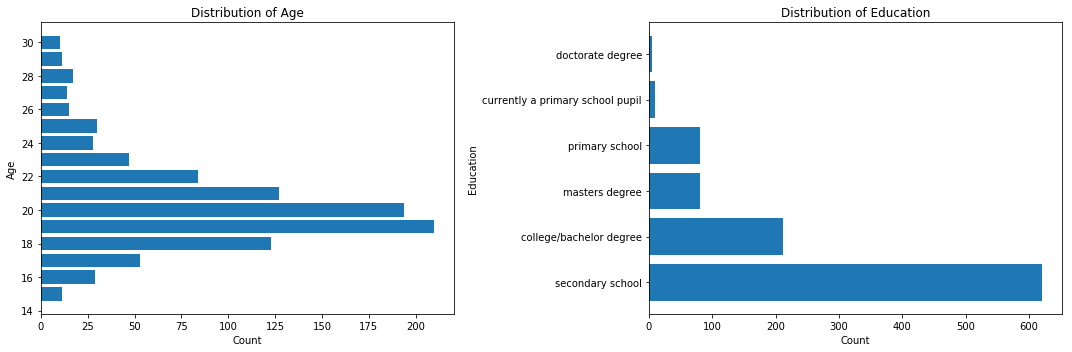

Average: 20.43 
STD: 2.83 
Mode: 19.0


In [40]:
age_dict = response_data.Age[response_data['Age'] != 0].value_counts()
age = list(np.int_(age_dict.keys()))
age_count = age_dict.values


edu = response_data.Education[response_data['Education'] != 0].value_counts().keys()
edu_count = response_data.Education[response_data['Education'] != 0].value_counts().values

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.barh(age, age_count)
plt.title('Distribution of Age')
plt.xlabel('Count')
plt.ylabel('Age')


plt.subplot(1,2,2)
plt.barh(edu, edu_count)
plt.yticks(np.arange(0,len(edu)), edu)

plt.title('Distribution of Education')
plt.xlabel('Count')
plt.ylabel('Education')

plt.tight_layout()
plt.show()

print('Average: ' + str(round(response_data.Age.mean(), 2)),
     '\nSTD: ' + str(round(response_data.Age.std(),2)),
     '\nMode: ' + str(round(response_data.Age.mode()[0], 2)))

Since the survey was conducted in the United Kingdom at the Comenius University in Bratislava, the population of this dataset is biased towards 20 year old college students that have just finished secondary school.

In [41]:
lonely = response_data.loc[response_data['Loneliness'] >= 4].copy()
not_lonely = response_data.loc[response_data['Loneliness'] <= 2].copy()
neutral = response_data.loc[response_data['Loneliness'] == 3].copy()

print('Lonely Count: {}'.format(len(lonely)),
      '\nNot Lonely Count: {}'.format(len(not_lonely)),
      '\nNeutral Count: {}'.format(len(neutral)))

Lonely Count: 272 
Not Lonely Count: 378 
Neutral Count: 359


Lonely and not lonely people are separated into different dataframes.

In [42]:
lonely_map = {1:'Not Lonely',
              2:'Not Lonely',
              3:'Neutral',
              4:'Lonely',
              5:'Lonely'}

response_data['lonely_map'] = response_data.Loneliness.map(lonely_map)

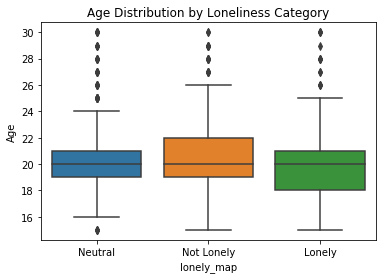

In [43]:
response_data2 = response_data[(response_data['lonely_map'] != 0)&(response_data['Age'] != 0)]

sns.boxplot(y= 'Age', x= 'lonely_map', data=response_data2)
plt.title('Age Distribution by Loneliness Category')
plt.show()

The mean age for all samples are roughly the same at around 20 years old. The lonely sample is skewed towards younger ages while the not lonely sample is skewed towards older ages. The lower percentile for the lonely sample is roughly  ages 18 to 19 years old. Being that freshman students are usually at that age, they are probably new to the school and don't have a set number of friends yet. 

Know that we have an idea of what the samples look like, lets see see which features correlate with loneliness the most. The plot below displays the strongest correlation coeficcients between the loneliness feature and other features.

In [44]:
#map categorical answers to integers 

smoking_map = {'never smoked': 1,
               'tried smoking': 2,
               'former smoker': 3}
alcohol_map = {'never': 1,
               'social drinker': 2,
               'drink a lot': 3}
internet_use_map = {'no time at all': 1,
                    'less than an hour a day': 2,
                    'few hours a day': 3, 
                    'most of the day': 4}

response_data['smoking_code'] = response_data.Smoking.map(smoking_map)
response_data['alcohol_code'] = response_data.Alcohol.map(alcohol_map)
response_data['internet_use_code'] = response_data['Internet usage'].map(internet_use_map)

In [45]:
#plots coeffiecient greater than .15 and less than -.15
corr = response_data.corr()
plot_corr = corr[(corr.Loneliness > .12) | (corr.Loneliness < -.12)]
plot_corr = plot_corr.Loneliness
plot_corr.drop('Loneliness', inplace = True)

/Users/marshallmamiya/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:3114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(obj)


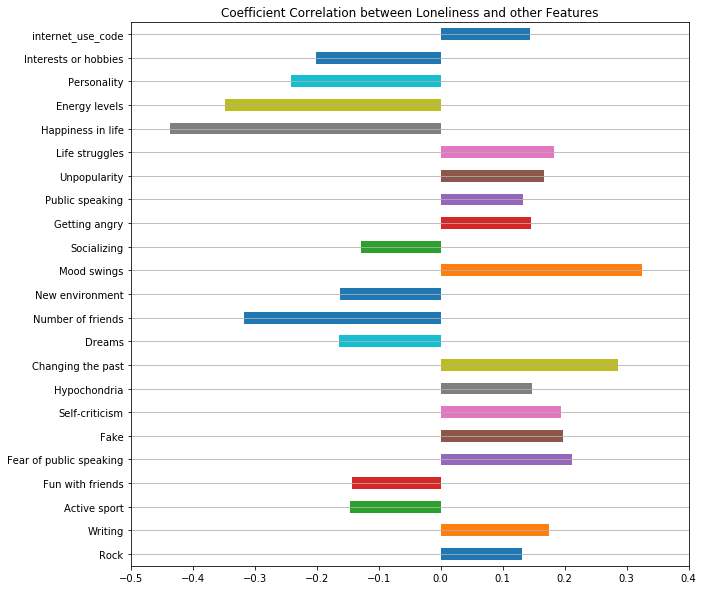

In [46]:
plt.figure(figsize=(10,10))
plot_corr.plot(kind = 'barh', grid=True)
plt.grid(axis = 'x')
plt.title('Coefficient Correlation between Loneliness and other Features')
plt.xticks(np.arange(-.5, .5, .1))
plt.show()

Interestingly enough, the strongest postive correlations were: mood swings, changing the past (I wish I could change the past because of the things I have done), fake (I can be two faced sometimes) and the strongest negative correlations were: happiness in life, energy levels (I am always full of life and energy.) and number of friends. 

Even though internet use didn't have a strong coefficient correlation with loneliness, I'm still determined to find some kind of correlation between the two. The reason why is because there has been numerous study on how the internet is effecting our social lives and 86% of people in this dataset use the internet more than a couple hours a day.

# Investigate

## Are lonelier people using the internet more?

In [47]:
# creates subplots between one feature (x_feature) and list of other features (subplot_features)
# labels: list of string labels for x_feature (x-axis)

def plot_features(df, x_feature, subplot_feature, title_labels, labels):
    
    fig = plt.figure(figsize=(25,5))
    df[subplot_feature].fillna(0, inplace = True)
    num_subplots = int(df[subplot_feature].max())

    for num in range(1, num_subplots + 1):
        lonely = df.loc[df[subplot_feature] == num, x_feature].groupby(df[x_feature]).count()
        lonely = lonely / sum(lonely) * 100
        lonely = lonely.reindex(np.arange(1,6), fill_value = 0)
        ax = plt.subplot(1,10,num)
        lonely.plot(kind = 'bar', ax = ax)
        plt.title(str(title_labels[num - 1]))
        plt.ylabel('Percentage')
        ax.set_xticklabels(labels)        

    plt.tight_layout()
    plt.show()
    

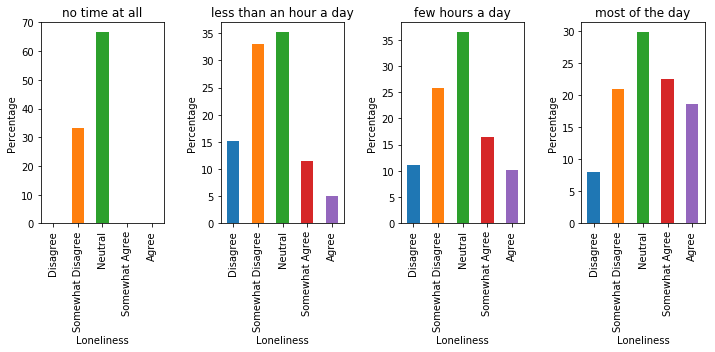

In [48]:
labels = ['Disagree', 'Somewhat Disagree', 'Neutral', 'Somewhat Agree', 'Agree']
title_labels = list(internet_use_map.keys())
plot_features(response_data, 'Loneliness', 'internet_use_code', title_labels, labels)

The barplots above represent the percentage of people that fall under each rating of loneliness and internet use. It may seem like the results are too good to be true - because they are. 

Only 3 peole fall under the category of "no time at all" and only 139 people  fall under the category of "less than an hour a day". This of course is not suprising since the population of this dataset is college students who obviously need the internet to do their schoolwork. 

Although what is suprising is the differences between the distribution of people who use the internet most of the day and a few hours a day. Out of all the people who spend most of the day on the internet, 18% of them feel lonely compared to only 10% of people who spend a few hours a day feel lonely. In addition, the somewhat lonely and lonely people combined make up 41% of the most of the day internet usage sample. 

Loneliness could be just one side effect of extensive internet usage (or vice versa) but what do lonely and non lonely people share in common? According to a study on the health effects of loneliness by [Dr. Clifford Singer](https://www.aginglifecarejournal.org/health-effects-of-social-isolation-and-loneliness/), obesity, increase risk of cardiovascular diseases, decrease in caring for ones health, increase risk of substance abuse, and depression are all possible mental and physical effects of loneliness. Some of these effects could be represented within the data. 

## What mental and social similarities do lonely people share?

In [49]:
def sample_plots(df, df2, columns_plot, title_labels, labels, fig_size, str_df1, str_df2):
    plt.figure(figsize= fig_size)

    for num, col in enumerate(columns_plot):
        counts1 = df[df[col] != 0][col].value_counts()
        counts1 = counts1 / sum(counts1) * 100
        
        counts2 = df2[df2[col] != 0][col].value_counts()
        counts2 = counts2 / sum(counts2) * 100
        
        counts = pd.DataFrame({str_df1: counts1, str_df2: counts2})
        
        ax = plt.subplot(np.ceil(len(columns_plot) / 2), 2, num+1)
        counts.plot(kind = 'bar', ax = ax)
        plt.title(title_labels[num])
        plt.xlabel('Answer Range')
        plt.ylabel('Percentage')
        
        
        if col == 'smoking_code':
            plt.xticks(np.arange(0,3,1), smoking_map.keys())
        
        elif col == 'alcohol_code':
            plt.xticks(np.arange(0,3,1), alcohol_map.keys())
        
        else:
            plt.xticks(np.arange(0,5,1), labels)
    
    plt.tight_layout()
    plt.show()
    

 

In [50]:
def get_original_question(col_data, short_col):
    original_question = []
    idx = [int(col_data.loc[col_data['short'] == col].index.values) for col in short_col]
    for i in idx:
        original_question.append(col_data.at[i, 'original'])
    return original_question

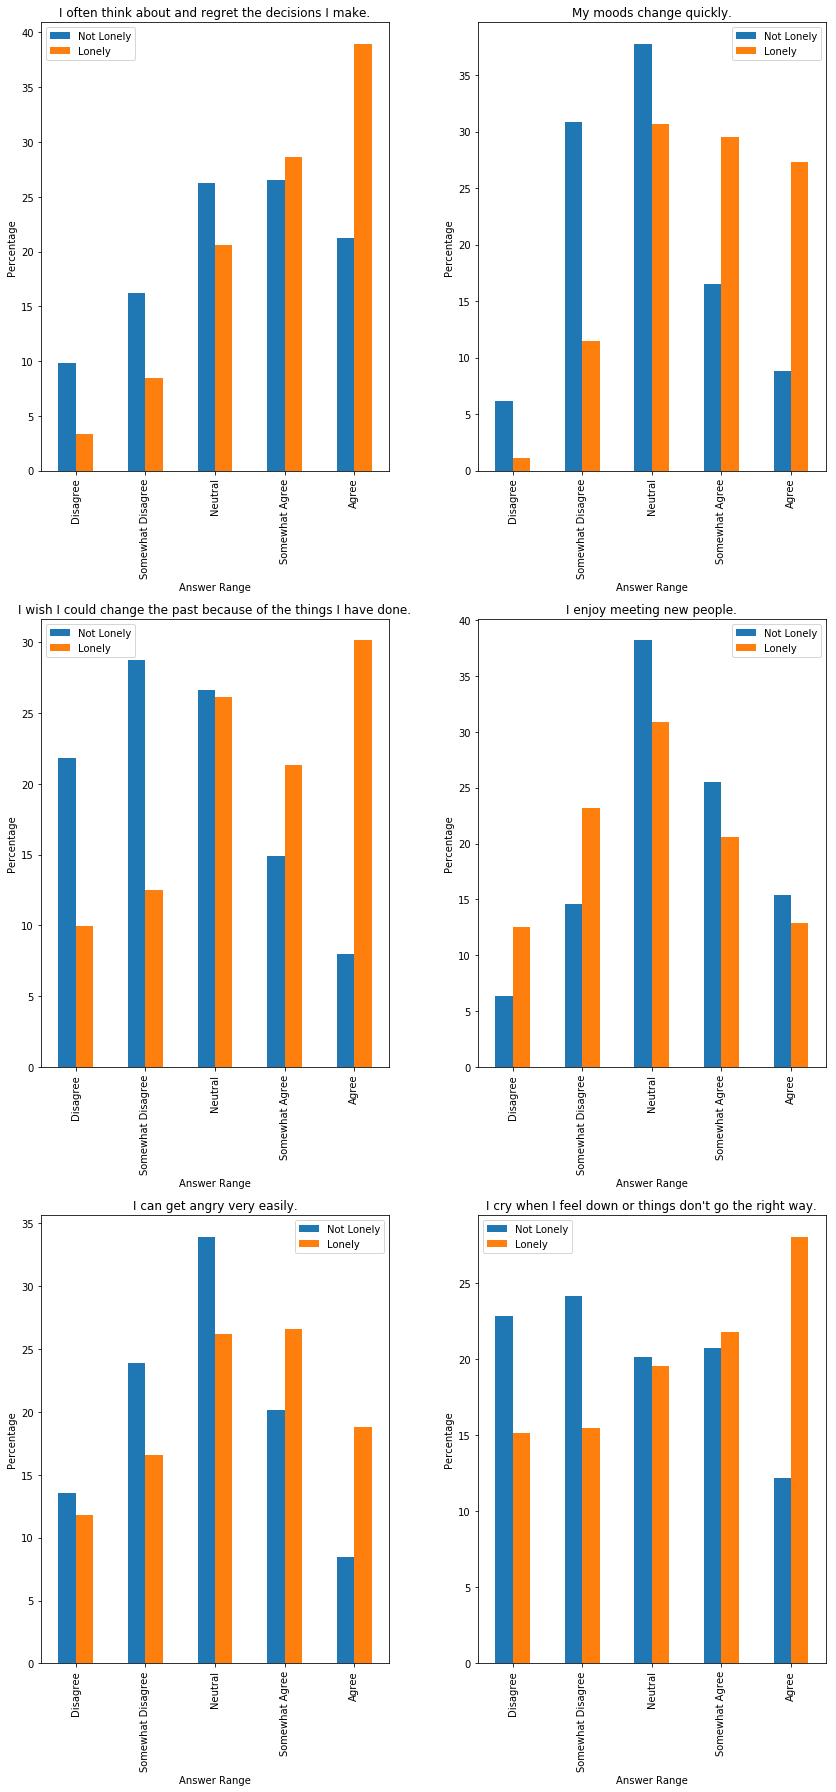

In [51]:
labels = ['Disagree', 'Somewhat Disagree', 'Neutral', 'Somewhat Agree', 'Agree']

#categorical_labels = pd.DataFrame([internet_use_map, smoking_map, alcohol_map])

mental_col = ['Self-criticism', 'Mood swings', 'Changing the past', 'Socializing', 'Getting angry', 'Life struggles',]

original_mental_col = get_original_question(col_data, mental_col)

sample_plots(not_lonely, lonely, mental_col, original_mental_col, labels, (12,25), 'Not Lonely', 'Lonely')

There seems to be a clear distinction that lonely people have stronger emotional reactions to different negative situations. 

As seen in the "I can get angry very easily" plot, about 20% of lonely people and only 10% of non-lonely people agree that they get angry easily.

The most staggering results are in the "I wish I could change the past because of things I've done" plot. Around 30% of lonely people agree to this statement compared to roughly 8% of non-lonely people. It seems like lonelier people have stronger negative emotions and thoughts. Lets see how the health questions compare.  

## Do lonely people have a healthy lifestyle?

In [52]:
not_lonely['smoking_code'] = not_lonely.Smoking.map(smoking_map)
lonely['smoking_code'] = lonely.Smoking.map(smoking_map)

not_lonely['alcohol_code'] = not_lonely.Alcohol.map(alcohol_map)
lonely['alcohol_code'] = lonely.Alcohol.map(alcohol_map)

not_lonely['internet_use_code'] = not_lonely['Internet usage'].map(internet_use_map)
lonely['internet_use_code'] = lonely['Internet usage'].map(internet_use_map)

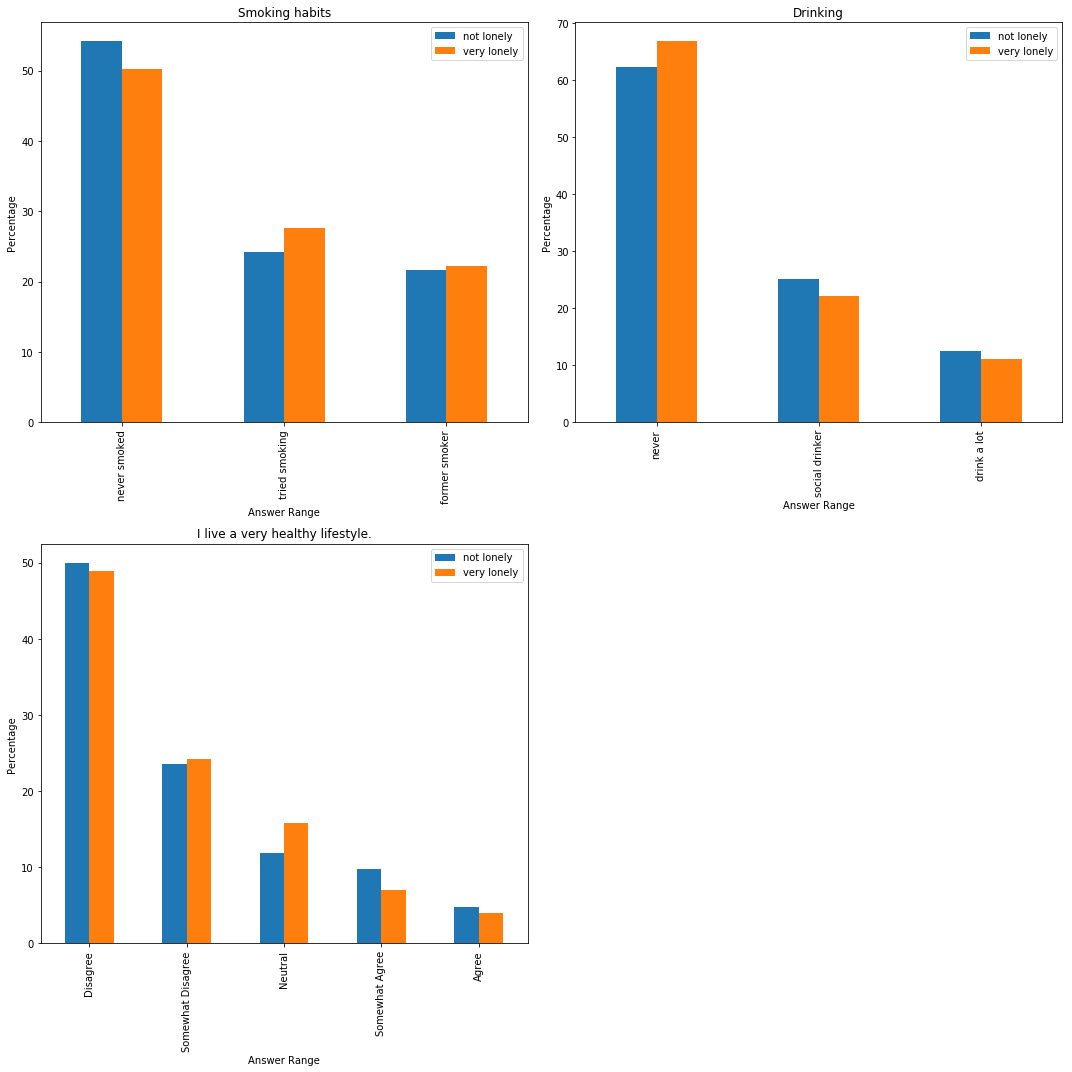

In [53]:
health_col = ['Smoking', 'Alcohol', 'Healthy eating']
health_col_map = ['smoking_code', 'alcohol_code', 'Healthy eating']
original_health_col = get_original_question(col_data, health_col)
sample_plots(not_lonely, lonely, health_col_map, original_health_col, labels, (15, 15), 'not lonely', 'very lonely')

Non-lonely and lonely people are in the same boat with substance use and physical health. In addition, it's surprising there are less social drinkers since the majority of the people are 20 year old college kids.

# KNN Prediction

Now that we know that the mental questions correlated the most with loneliness, lets see if we can predict if somebody is lonely by their answers to those questions. We'll be using a KNN classifer for the prediction.

In [54]:
#mental columns 

mental_col

['Self-criticism',
 'Mood swings',
 'Changing the past',
 'Socializing',
 'Getting angry',
 'Life struggles']

In [55]:
response_data.fillna(0, inplace = True)

labels_map = {1:0,
              2:0,
              3:0,
              4:1,
              5:1}
response_data['labels'] = response_data['Loneliness'].map(labels_map)
labels = response_data[~response_data.labels.isnull()]['labels']
data = response_data[~response_data.labels.isnull()][mental_col]
scaled_data = scale(data, axis = 0)

train_data, test_data, train_labels, test_labels = train_test_split(scaled_data, labels, 
                                                                    test_size = 0.2, random_state = 1)

In [59]:
accuracy = []
recall = []
precision = []
f1 = []
for k in range(1, 200, 10):
    
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    predicted = classifier.predict(test_data)
    if k == 11:
        print(predicted)
    accuracy.append(accuracy_score(test_labels, predicted))
    recall.append(recall_score(test_labels, predicted))
    precision.append(precision_score(test_labels, predicted))
    f1.append(f1_score(test_labels, predicted))
    
best_accuracy = (np.argmax(accuracy)*10, np.max(accuracy))
best_recall = (np.argmax(recall)*10, np.max(recall))
best_precision = (np.argmax(precision)*10, np.max(precision))
best_f1 = (np.argmax(f1)*10, np.max(f1))

print('Best Accuracy (k, score):', best_accuracy)
print('Best Recall (k, score):', best_recall)
print('Best Precision (k, score):', best_precision)
print('Best F1 (k, score):', best_f1)

[0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Best Accuracy (k, score): (30, 0.7871287128712872)
Best Recall (k, score): (0, 0.28888888888888886)
Best Precision (k, score): (150, 0.6666666666666666)
Best F1 (k, score): (20, 0.3333333333333333)


/Users/marshallmamiya/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/marshallmamiya/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/marshallmamiya/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/marshallmamiya/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/marshallmamiy

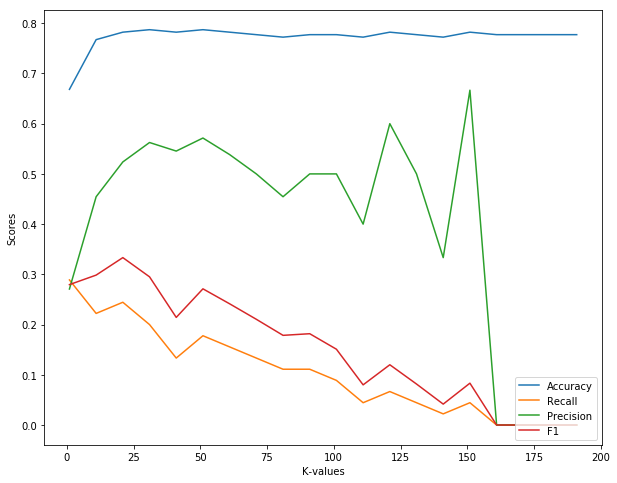

In [62]:

plt.figure(figsize = (10,8))    
plt.plot(np.arange(1,200,10), accuracy)
plt.plot(np.arange(1,200,10), recall)
plt.plot(np.arange(1,200,10), precision)
plt.plot(np.arange(1,200,10), f1)
plt.xlabel('K-values')
plt.ylabel('Scores')
plt.legend(['Accuracy', 'Recall', 'Precision', 'F1'], loc='lower right')
plt.show()

The best KNN model had a k-value of 21. Using that model, lets see if we can predict if somebody is lonely. 

describe generalize best k value 

In [63]:
def predict_lonely(columns, values):
    predict_dict = dict(zip(columns, values))
    print(predict_dict)

    predict_data = np.array(list(predict_dict.values())).reshape(1,-1)
    return predict_data

In [65]:
x = predict_lonely(mental_col, [4,2,4,3,2,3])

classifier = KNeighborsClassifier(n_neighbors = 22, weights = 'uniform')
classifier.fit(train_data, train_labels)
predicted = classifier.predict(x)

if predicted == 1:
    print('Lonely')
else:
    print('Not Lonely')

{'Self-criticism': 4, 'Mood swings': 2, 'Changing the past': 4, 'Socializing': 3, 'Getting angry': 2, 'Life struggles': 3}
Lonely


# Conclusion